In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sparklines import sparklines
import pygal

In [2]:
TS = pd.read_csv('totalsales_2018.csv')
EC = pd.read_csv('Electric_cars.csv')
EC

,Year,China,USA,Japan,UK,France,Germany,Netherlands,Canada,Sweden,Norway
0,2013,0.1,0.6,0.9,0.2,0.8,0.3,5.6,0.2,0.7,6
1,2014,0.2,0.7,1.1,0.6,0.7,0.4,3.9,0.3,1.5,14
2,2015,0.8,0.7,0.7,1.1,1.2,0.7,9.9,0.4,2.6,22
3,2016,1.3,0.9,0.6,1.4,1.4,1.1,6.7,0.6,3.5,29
4,2017,2.1,1.1,1.1,1.9,2.0,1.6,2.6,0.9,5.2,39
5,2018,4.2,2.1,1.0,2.5,2.1,1.9,6.5,2.2,8.2,49


In [3]:
TS

,Year,China,USA,Japan,UK,France,Germany,Netherlands,Canada,Sweden,Norway
0,2018,28080577,17701402,5272067,2734276,2632621,3822060,522870,1984992,418090,186836


In [4]:
estSale=EC[['Year']]
for i in list(EC)[1:]:
    percent=EC[i]
    total=TS[i][0]
    numberDF=(percent*total/100).to_frame()
    estSale=estSale.join(numberDF)

In [5]:
estSale

,Year,China,USA,Japan,UK,France,Germany,Netherlands,Canada,Sweden,Norway
0,2013,28080.577,106208.412,47448.603,5468.552,21060.968,11466.18,29280.72,3969.984,2926.63,11210.16
1,2014,56161.154,123909.814,57992.737,16405.656,18428.347,15288.24,20391.93,5954.976,6271.35,26157.04
2,2015,224644.616,123909.814,36904.469,30077.036,31591.452,26754.42,51764.13,7939.968,10870.34,41103.92
3,2016,365047.501,159312.618,31632.402,38279.864,36856.694,42042.66,35032.29,11909.952,14633.15,54182.44
4,2017,589692.117,194715.422,57992.737,51951.244,52652.420,61152.96,13594.62,17864.928,21740.68,72866.04
5,2018,1179384.234,371729.442,52720.670,68356.900,55285.041,72619.14,33986.55,43669.824,34283.38,91549.64


In [7]:
newColumns=EC['Year'].rename('Countries')
ECReverse = pd.DataFrame(EC.values.T, index=EC.columns, columns = newColumns)
ECReverse.drop(['Year'],inplace=True)
ECReverse

Countries,2013,2014,2015,2016,2017,2018
China,0.1,0.2,0.8,1.3,2.1,4.2
USA,0.6,0.7,0.7,0.9,1.1,2.1
Japan,0.9,1.1,0.7,0.6,1.1,1.0
UK,0.2,0.6,1.1,1.4,1.9,2.5
France,0.8,0.7,1.2,1.4,2.0,2.1
Germany,0.3,0.4,0.7,1.1,1.6,1.9
Netherlands,5.6,3.9,9.9,6.7,2.6,6.5
Canada,0.2,0.3,0.4,0.6,0.9,2.2
Sweden,0.7,1.5,2.6,3.5,5.2,8.2
Norway,6.0,14.0,22.0,29.0,39.0,49.0


In [9]:
#heatmap
format_dict = {'2013':'${0:,.1f}','2018':'${0:,.1f}'}
ECReverse.style.format(format_dict).background_gradient(subset=[2018],cmap='coolwarm')

Countries,2013,2014,2015,2016,2017,2018
China,0.1,0.2,0.8,1.3,2.1,4.2
USA,0.6,0.7,0.7,0.9,1.1,2.1
Japan,0.9,1.1,0.7,0.6,1.1,1
UK,0.2,0.6,1.1,1.4,1.9,2.5
France,0.8,0.7,1.2,1.4,2,2.1
Germany,0.3,0.4,0.7,1.1,1.6,1.9
Netherlands,5.6,3.9,9.9,6.7,2.6,6.5
Canada,0.2,0.3,0.4,0.6,0.9,2.2
Sweden,0.7,1.5,2.6,3.5,5.2,8.2
Norway,6,14,22,29,39,49


In [13]:
#styling with bars
ECReverse.style.format(format_dict).hide_columns(subset=[2014,2015,2016,2017]).bar(color='pink', vmin=0, subset=[2013],align='zero').bar(color='lightgreen', vmin=0, subset=[2018], align='zero')

Countries,2013,2018
China,0.1,4.2
USA,0.6,2.1
Japan,0.9,1
UK,0.2,2.5
France,0.8,2.1
Germany,0.3,1.9
Netherlands,5.6,6.5
Canada,0.2,2.2
Sweden,0.7,8.2
Norway,6,49


In [17]:
#sparkline
sparklineList=[]
i=0
while i < 10:
    sparkline = sparklines(ECReverse.iloc[i])
    i += 1
    sparklineList.append(sparkline)
sparklineList
ECReverse['Sparkline'] = sparklineList    

In [18]:
ECReverse

Countries,2013,2014,2015,2016,2017,2018,Sparkline
China,0.1,0.2,0.8,1.3,2.1,4.2,[▁▁▂▃▄█]
USA,0.6,0.7,0.7,0.9,1.1,2.1,[▁▁▁▂▃█]
Japan,0.9,1.1,0.7,0.6,1.1,1.0,[▅█▂▁█▇]
UK,0.2,0.6,1.1,1.4,1.9,2.5,[▁▂▄▅▆█]
France,0.8,0.7,1.2,1.4,2.0,2.1,[▂▁▃▄▇█]
Germany,0.3,0.4,0.7,1.1,1.6,1.9,[▁▁▃▄▇█]
Netherlands,5.6,3.9,9.9,6.7,2.6,6.5,[▄▂█▅▁▅]
Canada,0.2,0.3,0.4,0.6,0.9,2.2,[▁▁▂▂▃█]
Sweden,0.7,1.5,2.6,3.5,5.2,8.2,[▁▂▃▄▅█]
Norway,6.0,14.0,22.0,29.0,39.0,49.0,[▁▂▄▅▆█]


Text(0.5, 1.0, 'Line chart')

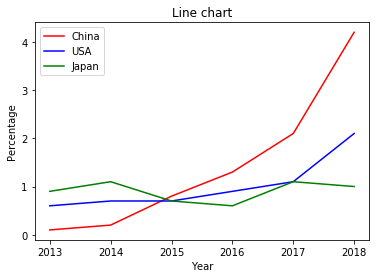

In [6]:
#line chart with China, USA and Japan
x = EC['Year']
y_China = EC['China']
y_USA = EC['USA']
y_Japan = EC['Japan']
plt.plot(x,y_China,label='China',color = 'red')
plt.plot(x,y_USA,label='USA',color = 'blue')
plt.plot(x,y_Japan,label='Japan',color = 'green')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Line chart')

Text(0.5, 1.0, 'Line chart for Countries')

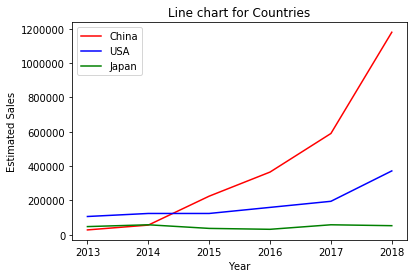

In [14]:
#line chart about estimated sales
x = estSale['Year']
y_China = estSale['China']
y_USA = estSale['USA']
y_Japan = estSale['Japan']
plt.plot(x,y_China,label='China',color = 'red')
plt.plot(x,y_USA,label='USA',color = 'blue')
plt.plot(x,y_Japan,label='Japan',color = 'green')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Estimated Sales')
plt.title('Line chart for Countries')

Text(0.5, 1.0, 'Grouped bar chart')

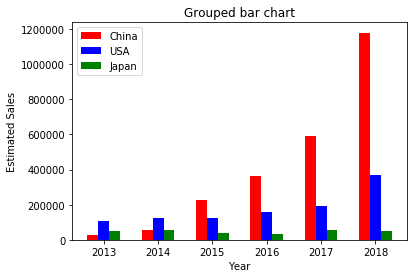

In [8]:
#Grouped bar chart about estimated sales
myWidth = 0.2
x_array = np.array(x.index)
plt.bar(x_array-myWidth,y_China,width=myWidth,label='China',color='red')
plt.bar(x_array,y_USA,width=myWidth,label='USA',color='blue',tick_label=x)
plt.bar(x_array+myWidth,y_Japan,width=myWidth,label='Japan',color='green')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Estimated Sales')
plt.title('Grouped bar chart')

Text(0.5, 1.0, 'Stacked bar chart for Countries')

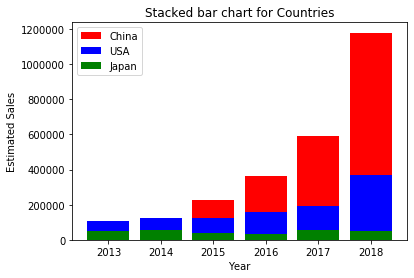

In [15]:
#stacked bar chart about estimated sales
plt.bar(x,y_China,label='China',color = 'red')
plt.bar(x,y_USA,label='USA',color = 'blue')
plt.bar(x,y_Japan,label='Japan',color = 'green')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Estimated Sales')
plt.title('Stacked bar chart for Countries')

Text(0.5, 1.0, 'Pie chart for 2018 ')

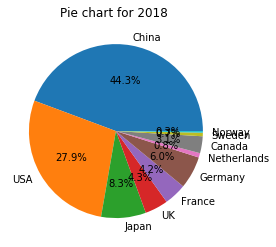

In [9]:
#pie chart for 2018
sizes = TS.iloc[0][1:]
countries = sizes.index
plt.pie(sizes,labels=countries,autopct='%1.1f%%')
plt.title('Pie chart for 2018 ')

Text(0.5, 1.0, 'Pie chart for 2018')

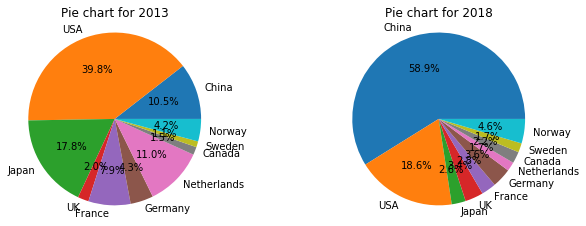

In [45]:
#different pie charts between 2 years about estimated sales
sizes2013 = estSale.iloc[0][1:]
countries = sizes2013.index
sizes2018 = estSale.iloc[5][1:]
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes2013, labels=countries,radius=1.5,autopct='%1.1f%%')
ax1.set_title('Pie chart for 2013',pad=30)
ax2 = fig.add_axes([.5, .0, 1, .5], aspect=1)
ax2.pie(sizes2018, labels=countries,radius=1.5,autopct='%1.1f%%')
ax2.set_title('Pie chart for 2018',pad=30)

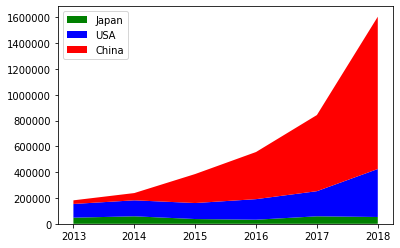

In [16]:
#stackplot about 3 countries
x=EC['Year']
y=np.vstack([y_Japan,y_USA,y_China])
plt.stackplot(x,y,colors=['green','blue','red'],labels=['Japan','USA','China'])
plt.legend(loc="upper left")